In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


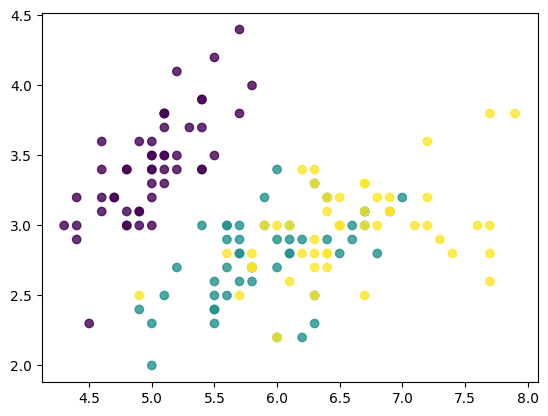

In [75]:
iris = load_iris()
X = iris.data
Y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=Y,  alpha=0.8)


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print("Train set: ", X_train.shape)
print("Test set: ", X_test.shape)

Train set:  (120, 4)
Test set:  (30, 4)


Text(0.5, 1.0, 'Test set')

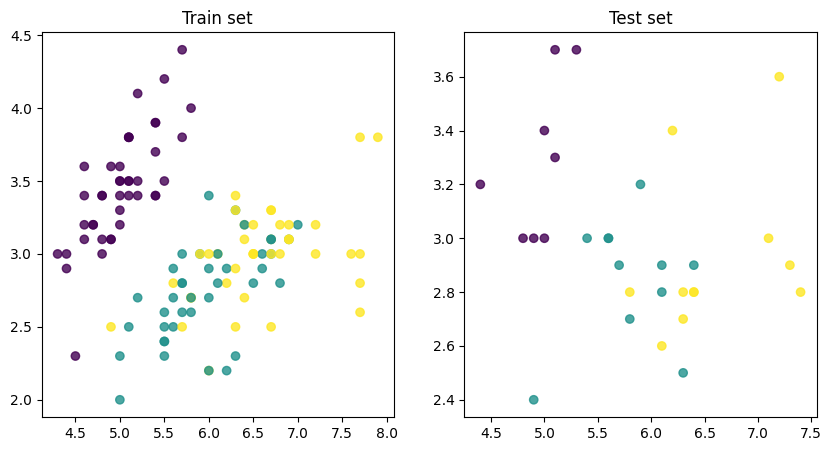

In [78]:
fig , ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train,  alpha=0.8)
ax[0].set_title("Train set")
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test,  alpha=0.8)
ax[1].set_title("Test set")

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
model = KNeighborsClassifier(n_neighbors=6)
model = model.fit(X_train, y_train)
print("Train set score: ", model.score(X_train, y_train))
print("Test set score: ", model.score(X_test, y_test))

Train set score:  0.9833333333333333
Test set score:  0.9666666666666667


In [81]:
from sklearn.model_selection import cross_val_score

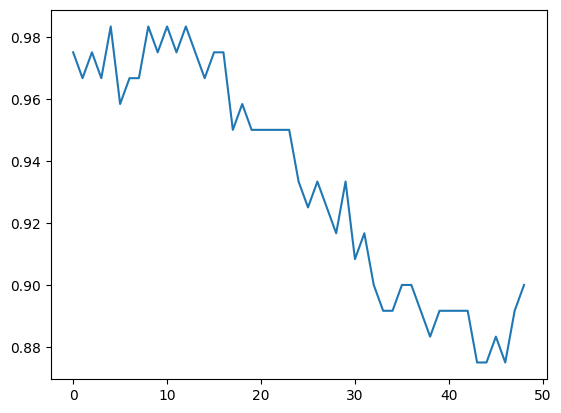

In [82]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
    
plt.plot(val_score)

In [83]:
from sklearn.model_selection import validation_curve

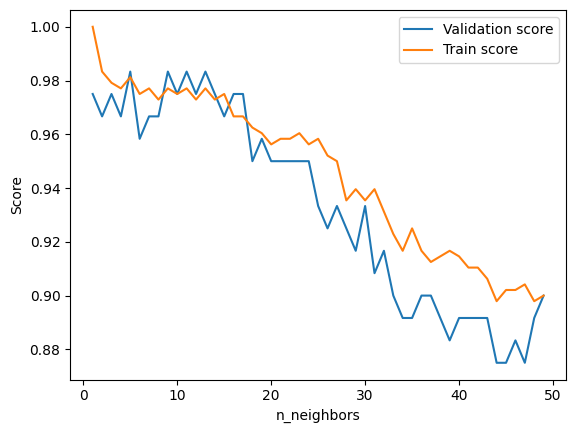

In [84]:
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score , val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)
fig , ax = plt.subplots()
ax.plot(k, val_score.mean(axis=1), label="Validation score")
ax.plot(k, train_score.mean(axis=1), label="Train score")
ax.set_xlabel("n_neighbors")
ax.set_ylabel("Score")
plt.legend()

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan'],
              }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [87]:
grid.best_score_

0.9833333333333334

In [88]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [89]:
model = grid.best_estimator_

In [90]:
model.score(X_test, y_test)

0.9333333333333333

In [91]:
from sklearn.metrics import confusion_matrix

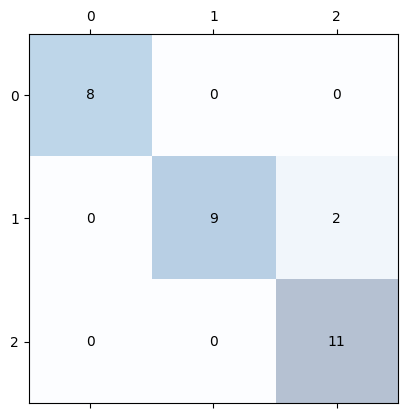

In [94]:
confusion_f = confusion_matrix(y_test, model.predict(X_test))
# faire un graphique de confusion_f
fig , ax = plt.subplots()
ax.matshow(confusion_f, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_f.shape[0]):
    for j in range(confusion_f.shape[1]):
        ax.text(x=j, y=i, s=confusion_f[i, j], va='center', ha='center')


In [95]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


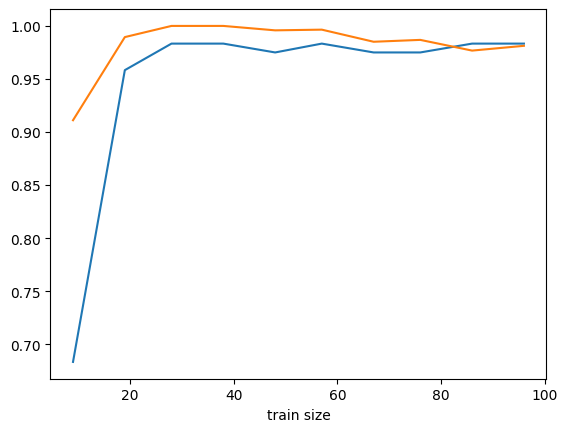

In [108]:
N , train_score , val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0 , 10), cv=5)
print(N)
fig , ax = plt.subplots()
ax.plot(N, val_score.mean(axis=1), label="Validation score")
ax.plot(N, train_score.mean(axis=1), label="Train score")
ax.set_xlabel("train size")
plt.show()